# CS677 Final Project

## Dataset - Heart Failure Prediction

### Attributes:
* Age: age of the patient [years]
* Sex: sex of the patient [M: Male, F: Female]
* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease: output class [1: heart disease, 0: Normal]

## Machine Learning Models

For this project, I will be implenting the following machine learning models and comparing the accuracy with which they predict the possibility of heart disease:
* Logistic Regression
* Decision Tree
* Random Forest
* Support Vector Machine (SVM) 

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

## Data Loading and Preprocessing

In [3]:
# Read dataset from CSV file
df = pd.read_csv("heart.csv")

# Display first five records to demonstrate successful read
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
# Get shape of data
df.shape

(918, 12)

In [4]:
# Explore the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
# Check for null values in each column
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [12]:
# Convert categorical variables to numerical
df["Sex"] = df["Sex"].map({"M": 1, "F": 0})
df["ChestPainType"] = df["ChestPainType"].map({"TA": 0, "ATA": 1, "NAP": 2, "ASY": 3})
df["RestingECG"] = df["RestingECG"].map({"Normal": 0, "ST": 1, "LVH": 2})
df["ExerciseAngina"] = df["ExerciseAngina"].map({"Y": 1, "N": 0})
df["ST_Slope"] = df["ST_Slope"].map({"Up": 0, "Flat": 1, "Down": 2})

In [13]:
# Descriptive statistics for numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
Sex,918.0,0.789760,0.407701,0.0,1.00,1.0,1.0,1.0
ChestPainType,918.0,2.251634,0.931031,0.0,2.00,3.0,3.0,3.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
RestingECG,918.0,0.603486,0.805968,0.0,0.00,0.0,1.0,2.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
ExerciseAngina,918.0,0.404139,0.490992,0.0,0.00,0.0,1.0,1.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


## Exploratory Data Analysis

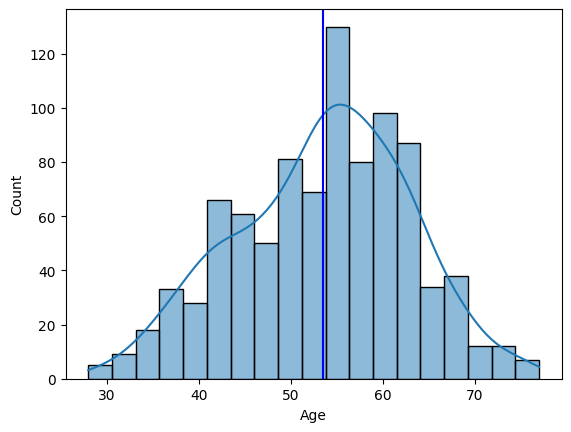

In [18]:
# Draw a histogram to see the distribution of the age column
sns.histplot(df["Age"], kde=True)

# Add line to indicate overall mean
plt.axvline(df["Age"].mean(), color="Blue")

Distribution of patient age is relatively normal, yet skewing slightly left which makes sense as younger people tend to not be susceptible to heart disease. In this case, it appears that the most common age in this data set is somewhere around the mid-50s. There are also a significant number of people in their 40s and 60s.

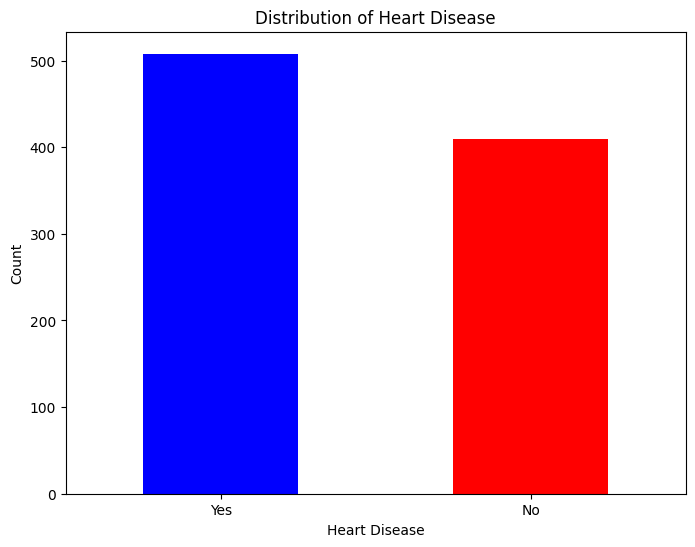

In [52]:
# Count the number of each class of heart disease
heart_disease_count = df["HeartDisease"].value_counts()

# Define plot size
plt.figure(figsize=(8, 6))

# Plot values onto chart
heart_disease_count.plot(kind="bar", color=["blue", "red"])

# Define plot and axes titles
plt.title("Distribution of Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Count")

# Modify x-axix labels
plt.xticks(ticks=[0, 1], labels=["Yes", "No"], rotation=0)

# Display plot
plt.show()

Cases of heart disease among patients is relatively evenly split, with it being slightly biased towards those that did get heart disease.

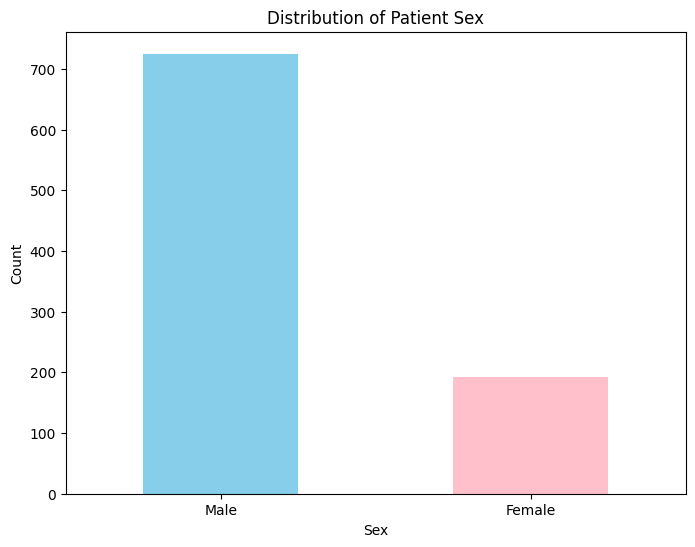

In [29]:
# Count the number of each sex
sex_count = df["Sex"].value_counts()

# Define plot size
plt.figure(figsize=(8, 6))

# Plot values onto chart
sex_count.plot(kind="bar", color=["skyblue", "pink"])

# Define plot and axes titles
plt.title("Distribution of Patient Sex")
plt.xlabel("Sex")
plt.ylabel("Count")

# Modify x-axix labels
plt.xticks(ticks=[0, 1], labels=["Male", "Female"], rotation=0)

# Display plot
plt.show()

<Figure size 1200x1000 with 0 Axes>

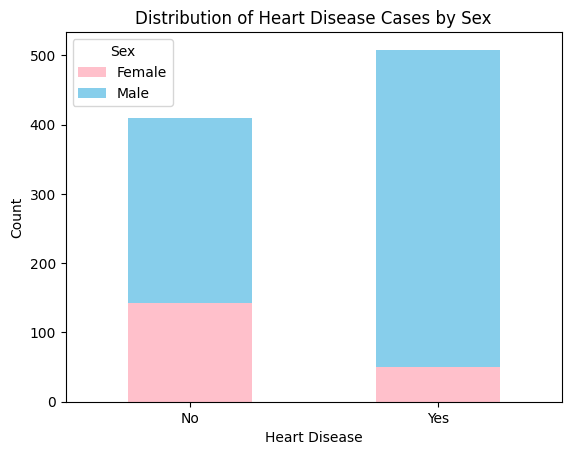

In [54]:
# Count the number of heart disease cases based on sex
heart_disease_sex_count = df.groupby(["HeartDisease", "Sex"]).size().unstack()

# Plot the stacked bar chart
plt.figure(figsize=(12, 10))
heart_disease_sex_count.plot(
    kind="bar",
    stacked=True,
    color=[
        "pink",
        "skyblue"],
)
plt.title("Distribution of Heart Disease Cases by Sex")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"], rotation=0)
plt.legend(title="Sex", labels=["Female", "Male"])
plt.show()

As seen above, a higher number of men suffered from heart disease versus women.

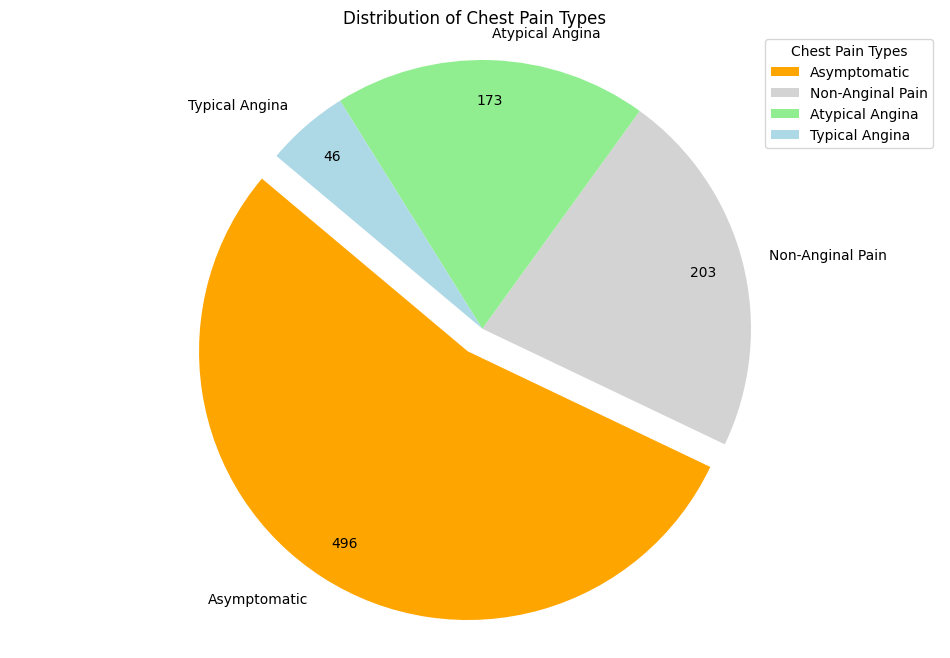

In [77]:
# Count the number of each chest pain type
chest_pain_count = df["ChestPainType"].value_counts()

# Define labels and colors
labels = ["Asymptomatic", "Non-Anginal Pain", "Atypical Angina", "Typical Angina"]
colors = ["orange", "lightgrey", "lightgreen", "lightblue"]
explode = (0.1, 0, 0, 0)

# Define plot size
plt.figure(figsize=(12, 8))

# Plot data onto chart
plt.pie(
    chest_pain_count,
    labels=labels,
    colors=colors,
    explode=explode,
    autopct=lambda p: f"{p * sum(chest_pain_count) / 100 :.0f}",
    startangle=140,
    pctdistance=0.85,
    labeldistance=1.1,
)

# Define plot and axis titles
plt.title("Distribution of Chest Pain Types")
plt.axis("equal")

# Display legend with labels
plt.legend(title="Chest Pain Types", loc="upper right")

# Display plot
plt.show()

In the above chart, ASY, or asymptomatic chest pain was by far the highest reported type of chest pain. That means that the patient experienced no prior symptoms before having a heart attack.

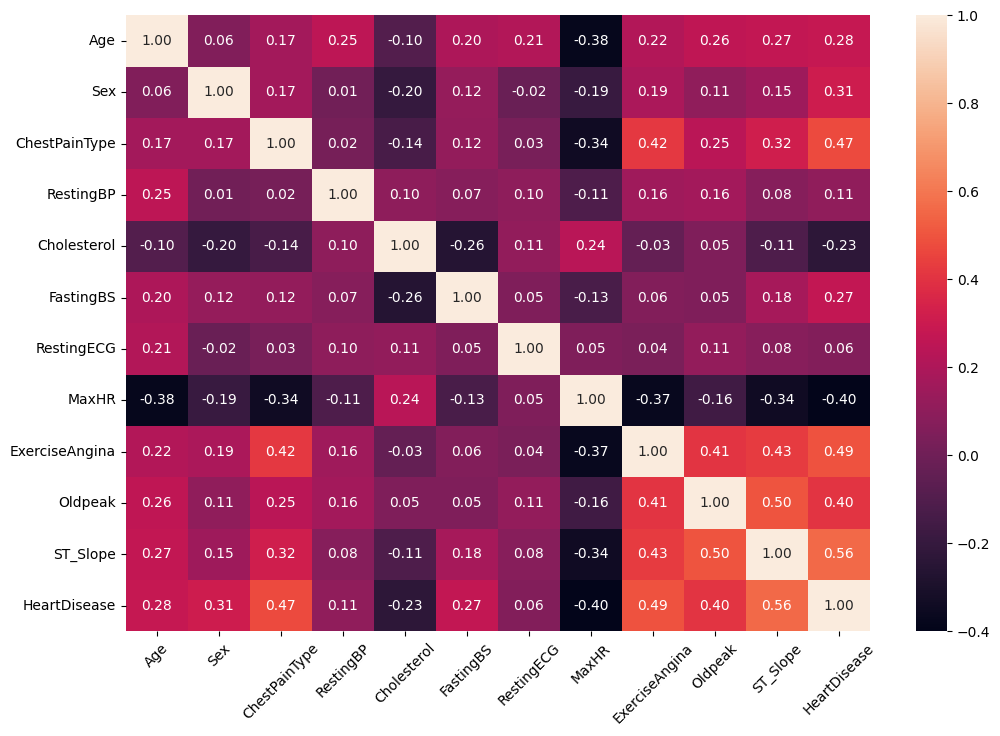

In [23]:
# Define plot size
plt.figure(figsize=(12, 8))

# Plot correlation heatmap
sns.heatmap(df.corr(), annot=True, fmt=".2f")

# Modify x-axis labels
plt.xticks(rotation=45)

# Display plot
plt.show()

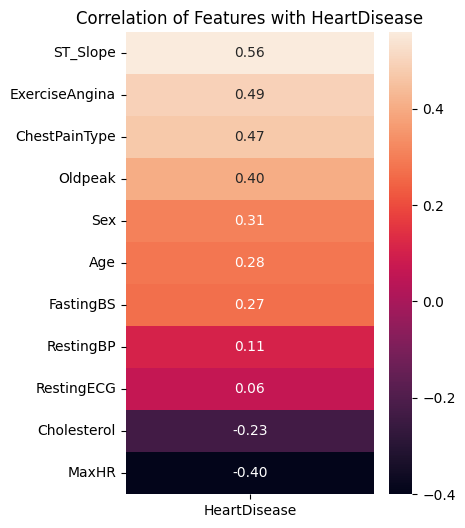

In [80]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Filter the correlation values related to HeartDisease
heart_disease_corr = corr_matrix["HeartDisease"].drop("HeartDisease")

# Sort correlation values from greatest to least
heart_disease_corr_sorted = heart_disease_corr.sort_values(ascending=False)

# Define plot size
plt.figure(figsize=(4, 6))

# Plot data onto chart
sns.heatmap(heart_disease_corr_sorted.to_frame(), annot=True, fmt=".2f")

# Define plot title
plt.title("Correlation of Features with HeartDisease")

# Display plot
plt.show()

Breaking down the correlation matrix specifically for the HeartDisease column, we see the following:

**Highest Correlation:**
* ST_Slope
* ExerciseAngina
* ChestPainType
* Oldpeak

**Lowest Correlation:**
* MaxHR
* Cholesterol
* RestingECG
* RestingBP

## Machine Learning Models

### Training Methodology
Unlike the $50/50$ split training methodology we used for our assignments, I will be going with $75/25$ split between my training and testing data. This will ensure that the models will have ample data to train on and the final predictions can be as accurate as we can get them. All models will be using the same train-test datasets from this initial split.

In [82]:
# Split the data into features and target
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

# Perform train-test split (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=29
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

In [83]:
# Define logistic regression model
log_reg = LogisticRegression()

# Fit model on training data
log_reg.fit(X_train, y_train)

# Predict values from training data
y_pred_log = log_reg.predict(X_test)

In [84]:
# Calculate accuracy score for logistic regression model
acc_log = accuracy_score(y_test, y_pred_log)

# Print accuracy for logistic regression model
print(f"Logistic Regression Model Accuracy: {acc_log * 100:.2f}%")

Logistic Regression Model Accuracy: 83.91%


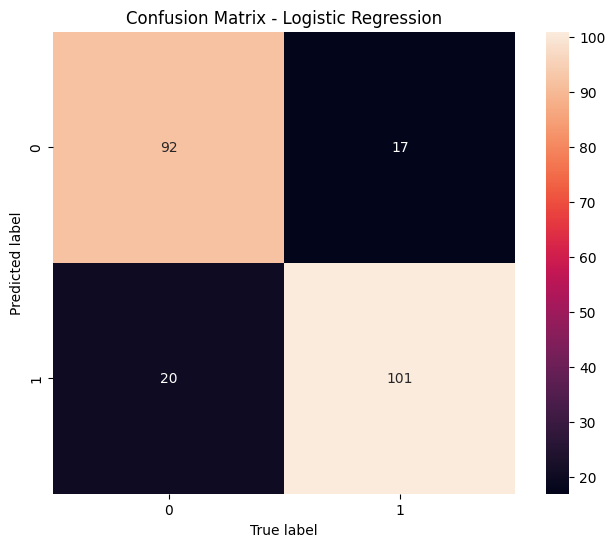

In [85]:
# Define plot size
plt.figure(figsize=(8, 6))

# Get the confusion matrix values
mat_log = confusion_matrix(y_test, y_pred_log)

# Plot the confusion matrix
sns.heatmap(
    mat_log.T,
    square=True,
    annot=True,
    fmt="d",
    cbar=True,
    xticklabels=np.unique(y),
    yticklabels=np.unique(y),
)

# Define axis labels and plot title
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.title("Confusion Matrix - Logistic Regression")

# Display plot
plt.show()

### Decision Tree Classifier

In [86]:
# Initialize the Decision Tree classifier
tree_clf = DecisionTreeClassifier(random_state=29)

# Train the classifier on the training data
tree_clf.fit(X_train, y_train)

# Predict values on the testing data
y_pred_tree = tree_clf.predict(X_test)

In [87]:
# Calculate the accuracy of the model
tree_accuracy = accuracy_score(y_test, y_pred_tree)

# Print accuracy for Decision Tree model
print(f"Decision Tree Model Accuracy: {tree_accuracy * 100:.2f}%")

Decision Tree Model Accuracy: 78.26%


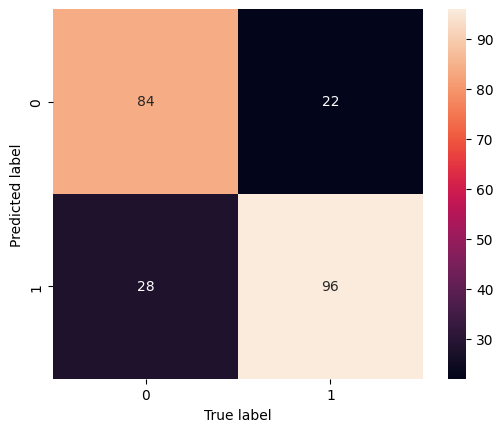

In [88]:
# Create the confusion matrix
mat = confusion_matrix(y_test, y_pred_tree)

# Plot the confusion matrix
sns.heatmap(
    mat.T,
    square=True,
    annot=True,
    fmt="d",
    cbar=True,
    xticklabels=np.unique(y),
    yticklabels=np.unique(y),
)

# Define axis labels
plt.xlabel("True label")
plt.ylabel("Predicted label")

# Display plot
plt.show()

### Random Forest Classifier

In [101]:
# Initialize empty list to store error rates
error_rates = []

# Define range for N and d arguments for model
n_values = range(1, 16)
d_values = range(1, 6)

# Iterate through multiple values of d for each value of N implementing RF Classifier
for n in n_values:
    for d in d_values:
        # Initialize the Random Forest classifier
        rf_clf = RandomForestClassifier(
            n_estimators=n, max_depth=d, criterion="entropy", random_state=29
        )

        # Train the classifier on the training data
        rf_clf.fit(X_train, y_train)

        # Predict values on the testing data
        y_pred = rf_clf.predict(X_test)

        # Calculate the error rate
        error_rate = 1 - accuracy_score(y_test, y_pred)

        # Store n_value, d_value, and error rate into list
        error_data = [n, d, error_rate]

        # Store the error data
        error_rates.append(error_data)

In [102]:
# Create a dataframe from the error data info
df_error_rates = pd.DataFrame(error_rates, columns=["N", "d", "Error Rate"])

# Display first five records
df_error_rates.head()

,N,d,Error Rate
0,1,1,0.300000
1,1,2,0.204348
2,1,3,0.178261
3,1,4,0.195652
4,1,5,0.195652


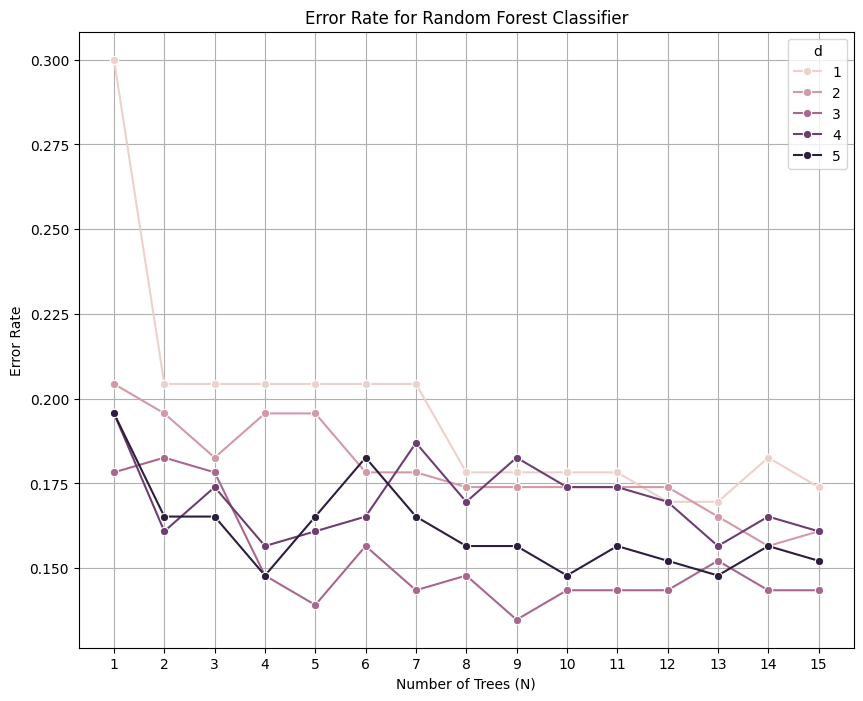

In [103]:
# Define plot size
plt.figure(figsize=(10, 8))

# Plot lines using data points from error_rates dataframe
sns.lineplot(data=df_error_rates, x="N", y="Error Rate", hue="d", marker="o")

# Define all titles and labels
plt.title("Error Rate for Random Forest Classifier")
plt.xlabel("Number of Trees (N)")
plt.ylabel("Error Rate")

# Define ticks for x-axis
plt.xticks(n_values)

# Show grid for contrast
plt.grid(True)

# Display plot
plt.show()

From the plot above, we can see that the combination with the lowest error rate was the Number of Trees (N) being 9, and the depth (d) being 3.

We calculated the error rate of the model by using the following equation:
$$
Error\ Rate = 1 - Accuracy
$$

To calculate accuracy, we simply flip the equation to be:
$$
Accuracy = 1 - Error\ Rate
$$

In [108]:
# Sort and retrieve record from dataframe with lowest error rate
sorted_error_df = df_error_rates.sort_values(by="Error Rate")
min_error_rate = sorted_error_df.head(1)["Error Rate"].iloc[0]

# Calculate the accuracy from the error rate
rf_accuracy = 1 - min_error_rate

# Print accuracy for Random Forest Classifier
print(f"Random Forest Classifier Accuracy: {rf_accuracy * 100:.2f}%")

Random Forest Classifier Accuracy: 86.52%


In [109]:
# Use Random Forest classifier with N=4 and d=5
best_rf_clf = RandomForestClassifier(
    n_estimators=9, max_depth=3, criterion="entropy", random_state=29
)

# Train the classifier on the training data
best_rf_clf.fit(X_train, y_train)

# Predict values on the testing data
best_rf_y_pred = best_rf_clf.predict(X_test)

In [112]:
# Reverify accuracy for best Random Forest
best_rf_acc = accuracy_score(y_test, best_rf_y_pred)

# Print accuracy for Decision Tree model
print(f"Best Random Forest Model Accuracy: {best_rf_acc * 100:.2f}%")

Best Random Forest Model Accuracy: 86.52%


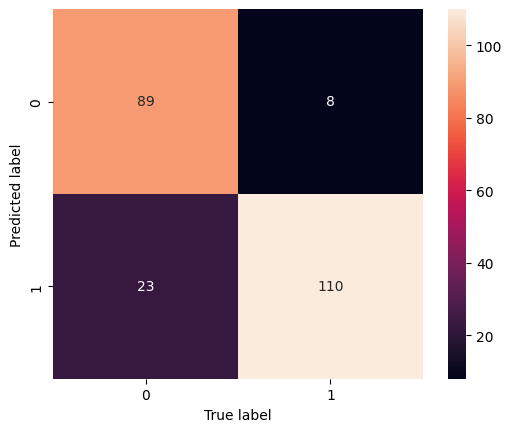

In [113]:
# Create the confusion matrix
mat = confusion_matrix(y_test, best_rf_y_pred)

# Plot the confusion matrix
sns.heatmap(
    mat.T,
    square=True,
    annot=True,
    fmt="d",
    cbar=True,
    xticklabels=np.unique(y),
    yticklabels=np.unique(y),
)

# Define axis labels
plt.xlabel("True label")
plt.ylabel("Predicted label")

# Display plot
plt.show()

### Support Vector Machine (SVM)

#### Linear Kernel SVM

In [114]:
# Initialize the Linear Kernel SVM classifier
svm_linear = SVC(kernel="linear", random_state=29)

# Train the classifier on the training data
svm_linear.fit(X_train, y_train)

# Predict values on the testing data
y_pred_svm_lin = svm_linear.predict(X_test)

In [118]:
# Calculate the accuracy of the Linear SVM model
svm_accuracy = accuracy_score(y_test, y_pred_svm_lin)

# Print accuracy for Linear SVM model
print(f"Accuracy of Linear Kernel SVM: {svm_accuracy * 100:.2f}%")

Accuracy of Linear Kernel SVM: 84.35%


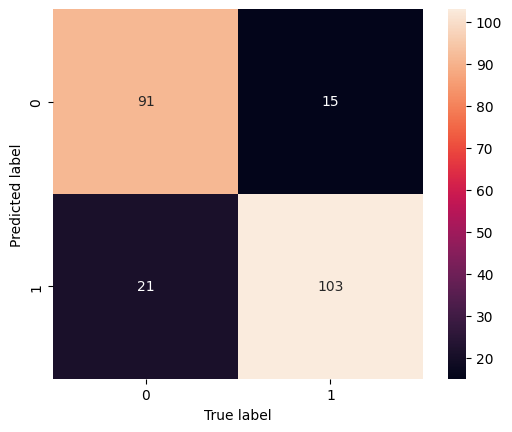

In [116]:
# Create the confusion matrix
mat = confusion_matrix(y_test, y_pred_svm_lin)

# Plot the confusion matrix
sns.heatmap(
    mat.T,
    square=True,
    annot=True,
    fmt="d",
    cbar=True,
    xticklabels=np.unique(y),
    yticklabels=np.unique(y),
)

# Define axis labels
plt.xlabel("True label")
plt.ylabel("Predicted label")

# Display plot
plt.show()

#### Gaussian Kernel SVM

In [119]:
# Define model for Gaussian Kernel SVM
gaussian_svm = SVC(kernel="rbf", C=1, gamma="scale", random_state=29)

# Fit model on training data
gaussian_svm.fit(X_train, y_train)

# Predict values onto test data
y_pred_gaussian = gaussian_svm.predict(X_test)

In [120]:
# Calculate accuracy score for the Gaussian Kernel SVM model
gaussian_acc = accuracy_score(y_test, y_pred_gaussian)

# Print model accuracy score
print(f"Gaussian Kernel SVM Accuracy: {gaussian_acc * 100:.2f}%")

Gaussian Kernel SVM Accuracy: 83.48%


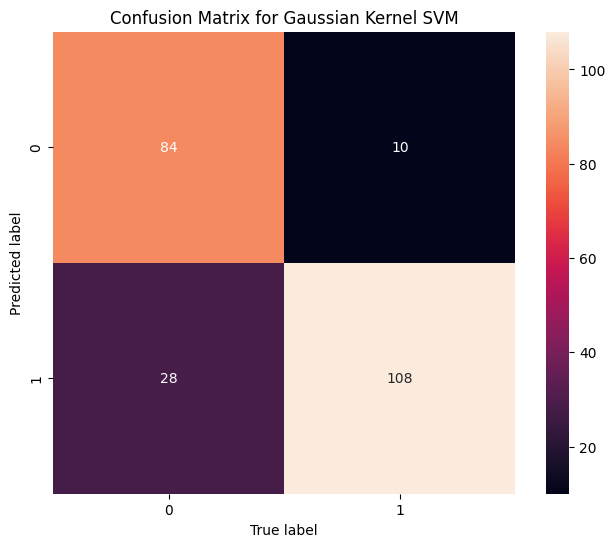

In [121]:
# Define plot size
plt.figure(figsize=(8, 6))

# Calculate confusion matrix values
mat_gaussian = confusion_matrix(y_test, y_pred_gaussian)

# Plot the confusion matrix
sns.heatmap(
    mat_gaussian.T,
    square=True,
    annot=True,
    fmt="d",
    cbar=True,
    xticklabels=np.unique(y_test),
    yticklabels=np.unique(y_test),
)

# Define plot title and axis labels
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.title("Confusion Matrix for Gaussian Kernel SVM")

# Display plot
plt.show()